In [2]:
import os
import pandas as pd
import sqlalchemy as sql
import numpy as np

!pip install pymysql
import pymysql
pymysql.install_as_MySQLdb()

!pip install mysql-connector-python
import mysql.connector

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [3]:
df_prices = pd.read_csv('Ether.csv')  
df_prices

,date,weighted,close,high,low,open,volume
0,12/23/2019 21:12,115.43,115.43,116.41,113.79,115.38,2.212945e+08
1,12/24/2019 21:12,112.58,112.58,114.33,111.54,115.43,2.178922e+08
2,12/25/2019 21:12,113.15,113.15,115.68,112.05,112.58,2.291283e+08
3,12/26/2019 21:12,113.07,113.07,113.72,111.97,113.15,2.394496e+08
4,12/27/2019 21:12,114.60,114.60,115.71,113.49,113.07,2.089934e+08
...,...,...,...,...,...,...,...
361,12/18/2020 21:12,535.84,535.84,554.27,532.34,533.52,3.715913e+08
362,12/19/2020 21:12,522.09,522.09,535.73,515.95,535.84,3.042156e+08
363,12/20/2020 21:12,497.56,497.56,507.61,490.50,522.09,4.047354e+08
364,12/21/2020 21:12,522.27,522.27,527.93,512.11,497.56,3.732303e+08


In [4]:
pd.options.display.float_format = '{:.1f}'.format

In [5]:
df_prices = df_prices.set_index(['date'])

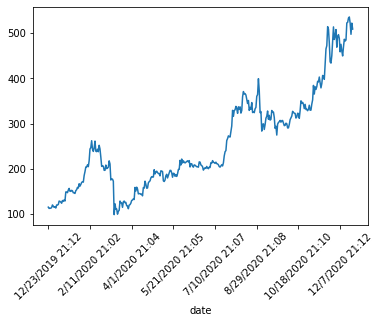

In [6]:
# Como vario el precio a lo largo de la historia?
df_prices['close'].plot()
plt.xticks(rotation='45')
plt.rcParams["figure.figsize"] = (5, 5)
plt.show()

In [7]:
# Cual es la variaciacion diara promedio? std.
# Defino la funcion modulo
def modulo(a):
    if (a>0):
        return a
    else:
        return -a

In [8]:
df_prices['var_day'] = df_prices['high'] - df_prices['low']

In [9]:
df_prices['var_day']

date
12/23/2019 21:12    2.6
12/24/2019 21:12    2.8
12/25/2019 21:12    3.6
12/26/2019 21:12    1.8
12/27/2019 21:12    2.2
                   ... 
12/18/2020 21:12   21.9
12/19/2020 21:12   19.8
12/20/2020 21:12   17.1
12/21/2020 21:12   15.8
12/22/2020 21:12   36.9
Name: var_day, Length: 366, dtype: float64

In [10]:
df_prices['var_day'].describe()

count   366.0
mean      9.7
std       8.1
min       1.5
25%       4.2
50%       7.2
75%      12.9
max      50.0
Name: var_day, dtype: float64

In [11]:
df_prices['var_day/val_tot'] = (df_prices['var_day'] / df_prices['open'])*100

In [12]:
# Varia en proemdio un 3,7% diario. (Analisis intra dia)
df_prices['var_day/val_tot'].describe()

count   366.0
mean      3.7
std       2.4
min       0.7
25%       2.1
50%       3.1
75%       4.6
max      15.7
Name: var_day/val_tot, dtype: float64

In [13]:
# Cuanto mas puede llegar a valer en diciembre del 2021?

def estimate_b0_b1(x, y):
    n = np.size(x)
    #obtenemos los promedios de X y de Y
    m_x, m_y = np.mean(x), np.mean(y)

    #Calcular sumatoria de XY y mi sumatoria de XX
    Sumatoria_xy = np.sum((x-m_x)*(y-m_y))
    Sumatoria_xx = np.sum(x*(x-m_x))

    #coeficientes de regresion
    b_1 = Sumatoria_xy / Sumatoria_xx
    b_0 = m_y - b_1*m_x

    return(b_0, b_1)

def plot_regression(x, y, b):
    plt.scatter(x, y, color = "g", marker = "o", s=30)

    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color = "b")

    #etiquetado
    plt.xlabel('x-Independiente')
    plt.ylabel('y-Dependiente')

    plt.show()

Los valores b0 = 91.59893732970028, b1 =0.8992144462509124


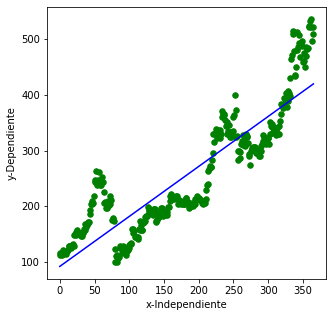

In [14]:
df_prices = df_prices.reset_index()
df_prices_ids = df_prices.index.to_numpy()
df_prices_close = df_prices['close'].to_numpy()

def main():
    #DATASET
    x = df_prices_ids
    y = df_prices_close

    #Obtenemos b1 y b2
    b = estimate_b0_b1(x, y)
    print("Los valores b0 = {}, b1 ={}".format(b[0], b[1]))

    #Graficamos nuestra linea de regresion
    plot_regression(x, y, b)

if __name__== "__main__":
    main()

In [15]:
# Predigo el valor del ano que viene
91.59893732970028 + 0.8992144462509124*365*2

748.0254830928664

In [16]:
# Cual es la ganancia estimada?
(((91.59893732970028 + 0.8992144462509124*365*2) - (91.59893732970028 + 0.8992144462509124*365)) / (91.59893732970028 + 0.8992144462509124*365*2))*100

43.87728497223347

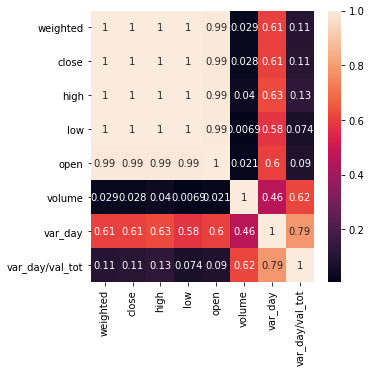

In [19]:
sns.heatmap(df_prices.corr(), annot= True)

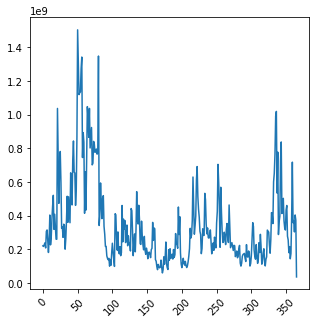

In [20]:
df_prices['volume'].plot()
plt.xticks(rotation='45')
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

Los valores b0 = 477767049.78742975, b1 =-706645.1180469989


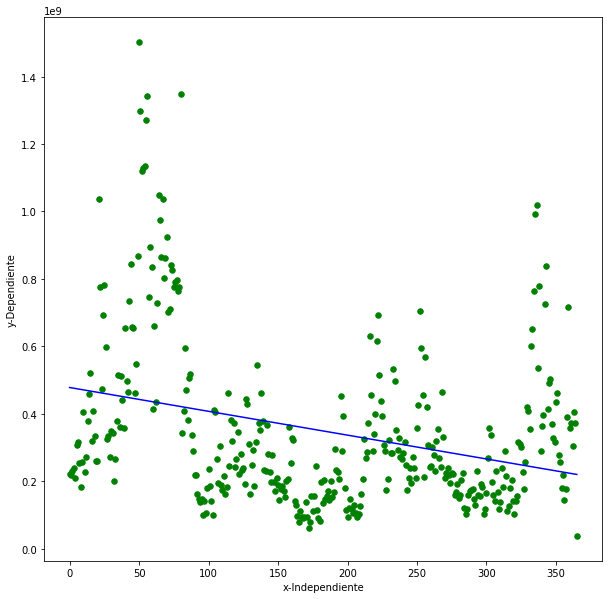

In [21]:
df_prices_ids = df_prices.index.to_numpy()
df_prices_close = df_prices['volume'].to_numpy()

if __name__== "__main__":
    main()

In [22]:
#No varia directamente relacionado al volumen de transacciones en el mercado. De hecho, resulta ser una moneda menos volatil
#Esto esta relacionado con que sus tenedores no venden ante la baja. El volumen de transaccinones en el mercado es negativo
#A pesar de tener cada vez mas capitalizacion. Es una moneda menos especulativa y mejor para tenencia a plazos mas largos.

In [26]:
# Conociendo apertura cierre, cual es mi ganancia estimada que contemple el error std promedio.
df_prices['var_std'] = ((( df_prices['close'] - df_prices['open'] ) / df_prices['open']) * 100 ) + 43.87728497223347

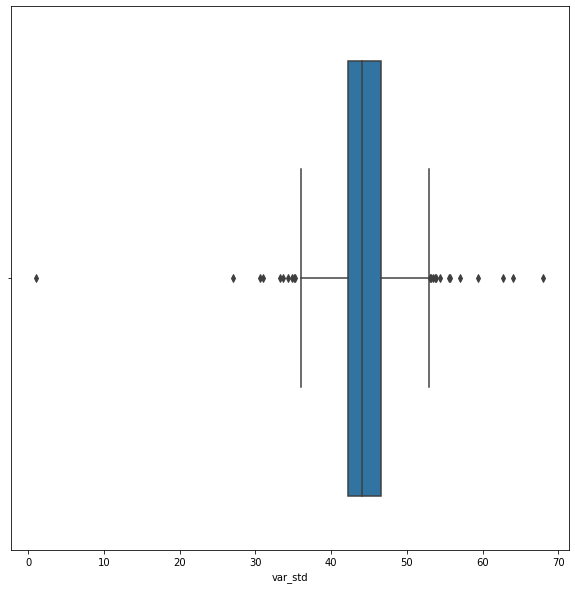

In [27]:
#Con variacion de ganancia.
ax = sns.boxplot(x=df_prices['var_std'])

In [28]:
df_prices['var_std'].describe()

count   366.0
mean     44.4
std       5.1
min       1.1
25%      42.3
50%      44.1
75%      46.6
max      68.0
Name: var_std, dtype: float64